In [51]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from skimage import measure
import os

In [52]:
im_width = 256
im_height = 512

pixel_size = 0.303030
slice_thickness = 2

In [53]:
sub_name = 'AMC006'
gt_dir = '../res/maps/GT/'
pred_dir = '../res/maps/T1w/plaqueuqalp_simple/'

In [54]:
def get_mask_filenames(sub, folder):
    
    sub_dir = folder + sub
    filenames = []
    for item in os.listdir(sub_dir):
        filenames.append(os.path.join(sub_dir, item))
        
    return filenames.sort()

In [57]:
def get_mask3d(filenames):
    
    mask3d = np.zeros([im_height, im_width, len(filenames)], dtype = np.uint8)
    counter = 0
    for filename in filenames:
        mask2d = np.load(filename)
        mask3d[..., counter] = (mask2d>0)&(mask2d<7)
        counter += 1
        
    return mask3d

In [56]:
filenames_gt = get_mask_filenames(sub_name, gt_dir)
filenames_pred = get_mask_filenames(sub_name, pred_dir)

In [59]:
filenames_gt

In [58]:
mask3d_gt = get_mask3d(filenames_gt)
mask3d_pred = get_mask3d(filenames_pred)

TypeError: object of type 'NoneType' has no len()

In [41]:
def plot_3d(image):  
     
    verts, faces, normals, values = measure.marching_cubes(image, 0)

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    mesh = Poly3DCollection(verts[faces], alpha=0.1)
    mesh.set_facecolor('blue')
    ax.add_collection3d(mesh)

    ax.set_xlim(0, image.shape[0])
    ax.set_ylim(0, image.shape[1])
    ax.set_zlim(0, image.shape[2])
    
    x_ticks = list(np.arange(0, image.shape[0], 50))
    y_ticks = list(np.arange(0, image.shape[1], 50))
    z_ticks = list(np.arange(0, image.shape[2], 2))
    
    x_labels = ["%.0f" % x for x in list(np.arange(0, image.shape[0], 50)*pixel_size)] 
    y_labels = ["%.0f" % y for y in list(np.arange(0, image.shape[1], 50)*pixel_size)] 
    z_labels = ["%.0f" % z for z in list(np.arange(0, image.shape[2], 2)*slice_thickness)] 
    
    ax.set_xticks(x_ticks)
    ax.set_yticks(y_ticks)
    ax.set_zticks(z_ticks)   
    
    ax.set_xticklabels(x_labels)
    ax.set_yticklabels(y_labels)
    ax.set_zticklabels(z_labels)

    plt.show()

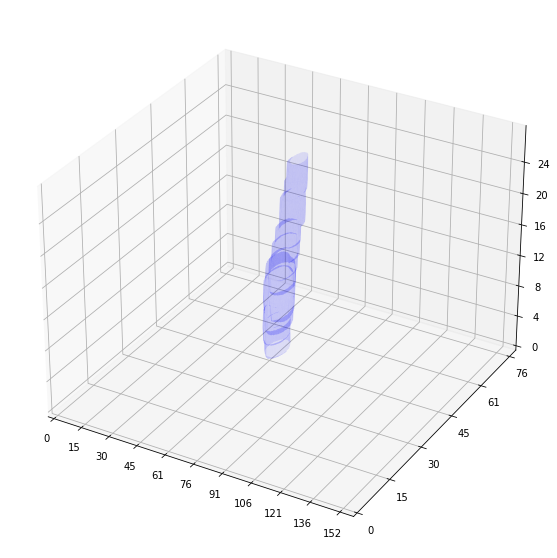

In [43]:
plot_3d(mask3d)